In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
import random as rnd
import matplotlib.pyplot as plt

In [2]:
# Wczytuję dane
boston = datasets.load_boston()

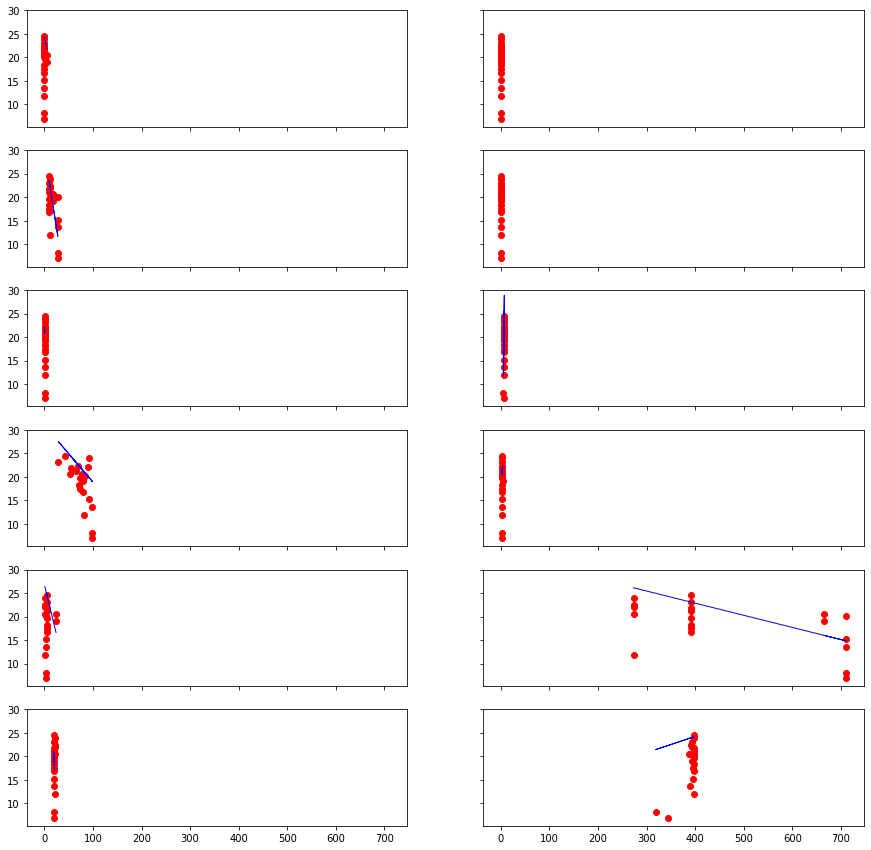

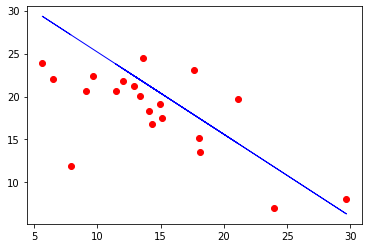

In [3]:
f, axarr = plt.subplots(6,2, sharex=True, sharey=True,figsize=(15,15))
for i in range(0,6):
    for j in range(0,2):
        boston_X = boston.data[:, np.newaxis, i*2+j]
        # Dzielę dane na część trenującą i testującą
        boston_dataset_X_train = boston_X[:-20]
        boston_dataset_X_test = boston_X[-20:]
        
        boston_dataset_y_train = boston.target[:-20]
        boston_dataset_y_test = boston.target[-20:]
        
        regr = linear_model.LinearRegression()
        
        regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
        axarr[i,j].scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
        axarr[i,j].plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()
boston_X = boston.data[:, np.newaxis, 12]
        # Dzielę dane na część trenującą i testującą
boston_dataset_X_train = boston_X[:-20]
boston_dataset_X_test = boston_X[-20:]
        
boston_dataset_y_train = boston.target[:-20]
boston_dataset_y_test = boston.target[-20:]
        
regr = linear_model.LinearRegression()
        
regr.fit(boston_dataset_X_train, boston_dataset_y_train)
        
plt.scatter(boston_dataset_X_test, boston_dataset_y_test,  color='red')
plt.plot(boston_dataset_X_test, regr.predict(boston_dataset_X_test), color='blue', linewidth=1)
plt.show()

In [4]:
# Wczytuję dane do stworzenia porównania i od razu dziele je na część do trenowania
# i część testującą
diabetes = datasets.load_diabetes()

diabetes_X = diabetes.data
diabetes_Y = diabetes.target

diabetes_X_train = diabetes_X[:-50]
diabetes_X_test = diabetes_X[-50:]

diabetes_y_train = diabetes_Y[:-50]
diabetes_y_test = diabetes_Y[-50:]

In [5]:
# Tworzę słownik zawierający obiekty rozpatrywanych typów regresji
regressors = {}
regressors['LinReg'] =linear_model.LinearRegression()
regressors['Ridge'] = linear_model.Ridge(alpha = .5)
regressors['Lasso'] = linear_model.Lasso(alpha = 5.1)
regressors['ElNet'] =linear_model.ElasticNet(alpha = .5, l1_ratio=0.5)

In [6]:
# Następnie dla każdego obliczam błąd i zapamiętuje w zmienej fit_results
fit_results={}
for key in regressors:
    # Train the model using the training sets
    regr = regressors[key]
    regr.fit(diabetes_X_train, diabetes_y_train)
    # mean square error
    mse = np.mean((regr.predict(diabetes_X_test) - diabetes_y_test) ** 2)
    w = regr.coef_
    # l1 norm
    wl1 = np.sum(np.abs(w))
    # l2 norm
    wl2 = np.sqrt(np.sum(w**2))
    fit_results[key]= { 'mse': mse, 'wl2': wl2, 'wl1': wl1, 'w': w}
    print("{}\n----------\n  mse={}\n  wl1={}\n  wl2={}\n  w={}\n ".format(key,mse,wl1,wl2,w))

LinReg
----------
  mse=1789.5698810318208
  wl1=3260.703769182654
  wl2=1274.171756925127
  w=[   1.19680495 -233.50366519  519.88450429  304.48097981 -726.44619916
  415.80697199   83.01061117  203.1648289   667.92936385  105.27983988]
 
Ridge
----------
  mse=2384.1858647392587
  wl1=1511.0823340013712
  wl2=589.1449165292609
  w=[  23.62740295 -119.32265523  362.44657362  222.30799722  -11.56467397
  -45.46192157 -169.43933329  129.82831679  292.72970213  134.35375724]
 
Lasso
----------
  mse=5912.974117294878
  wl1=0.0
  wl2=0.0
  w=[ 0.  0.  0.  0.  0.  0. -0.  0.  0.  0.]
 
ElNet
----------
  mse=5781.123148775016
  wl1=39.063433331886635
  wl2=14.336395063161204
  w=[ 1.48801264  0.          7.23427291  4.94114391  2.19772301  1.7139797
 -4.52179996  5.31415092  6.88097675  4.77137353]
 


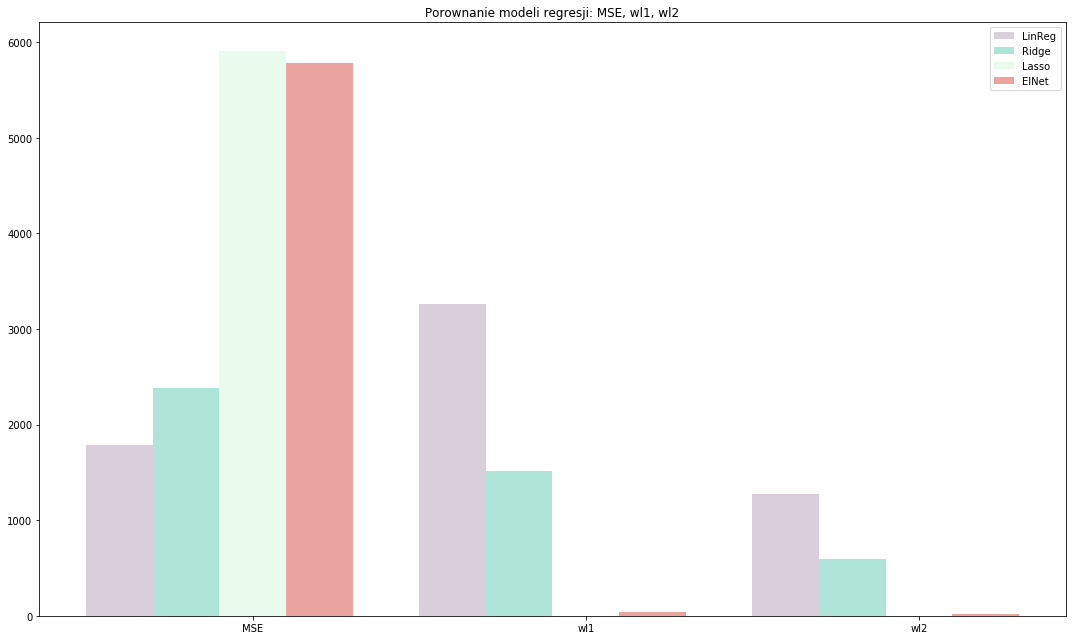

In [7]:
groups = 3
index = np.arange(groups)
bar_width = .2
opacity = 0.4
fig, ax = plt.subplots(figsize=(15,9))
t=0
# W pętli pobieram obliczone wartości i rysuję w postaci wykresu słupkowego
for key in regressors:
    results = fit_results[key]
    res_val = (results['mse'],results['wl1'],results['wl2'])
    plt.bar(index+ bar_width*t, res_val, bar_width,
                 alpha=opacity,
                 color=np.random.rand(1,3),
                 label=key)
    t+=1
# Rysowanie wykresu
plt.title('Porownanie modeli regresji: MSE, wl1, wl2')
plt.xticks(index + (t-2)*bar_width, ('MSE', 'wl1', 'wl2'))
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
# Przy pomocy pandas pobieram dane małżeństw w województwach, które skopiowałem do pliku csv, następnie przypisuje
# wartości obu kolumn do dwóch różnych zmiennych
dane = pd.read_csv('malzenstwa.csv')
ludnosc = dane['ludnosc'] 
malzenstwa = dane['malzenstwa']
#Zamieniam dane z tabeli na Dataframy, które są wymagane do dalszych operacji
ludnosc_X = pd.DataFrame(ludnosc)
malzenstwa_Y = pd.DataFrame(malzenstwa)

In [9]:
# Tworzę obiekt linearregression, który pozwoli na stworzenie wykresu regresji liniowej i używam jego metod do
# dopasowania danych do moich potrzeb i próby przewidzenia wartości
linear_regressor = linear_model.LinearRegression()
linear_regressor.fit(ludnosc_X, malzenstwa_Y)
Y_pred = linear_regressor.predict(ludnosc_X)

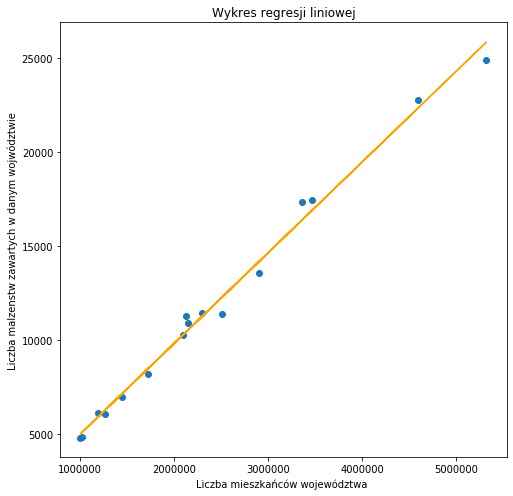

In [10]:
#Rysowanie wykresu, scatter rysuje punkty
plt.figure(figsize=(8, 8))
plt.scatter(ludnosc_X, malzenstwa_Y)
plt.plot(ludnosc_X, Y_pred, color="orange")
plt.ylabel('Liczba malzenstw zawartych w danym wojwództwie')
plt.xlabel('Liczba mieszkańców województwa ')
plt.title('Wykres regresji liniowej')
plt.show()

In [11]:
# Przy pomocy pandas pobieram dane z linku4, które skopiowałem do pliku csv, następnie przypisuje
# wartości obu kolumn do dwóch różnych zmiennych
dane = pd.read_csv('link4.csv')
dochody = dane['Dochody']
wydatki = dane['Wydatki']
#Zamieniam dane z tabeli na Dataframy, które są wymagane do dalszych operacji
dochody_X = pd.DataFrame(dochody)
wydatki_Y = pd.DataFrame(wydatki)

In [12]:
# używam metod linearregression do dopasowania danych do moich potrzeb i próby przewidzenia wartości
linear_regressor.fit(dochody_X, wydatki_Y)
Y_pred = linear_regressor.predict(dochody_X)

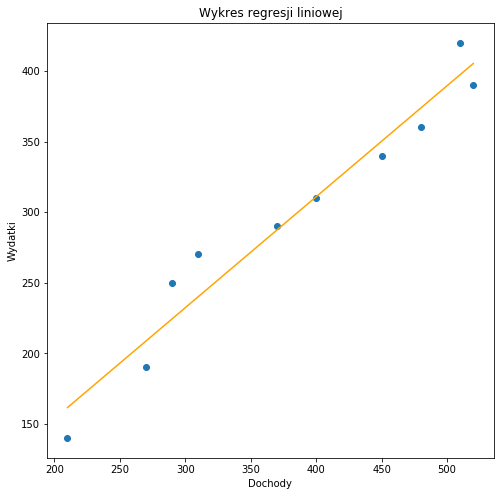

In [13]:
#Rysowanie wykresu, scatter rysuje punkty
plt.figure(figsize=(8, 8))
plt.scatter(dochody_X, wydatki_Y)
plt.plot(dochody_X, Y_pred, color="orange")
plt.ylabel('Wydatki')
plt.xlabel('Dochody')
plt.title('Wykres regresji liniowej')
plt.show()

In [14]:
# Najpierw tworzę 100 randomowych wartości
xData = rnd.sample(range(100), 100)
yData = rnd.sample(range(100), 100)

# Wyliczam średnią arytmetyczną obu kolumn
xAverage = np.mean(xData)
yAverage = np.mean(yData)

# Kolejnym krokiem będzie odjęcie od każdej pojedyńczej wartości średnią dla obu kolumn
xSub = []
ySub = []

for i in range(99):
    xSub.append(xData[i] - xAverage)
for j in range(99):
    ySub.append(yData[j] - yAverage)

# Następnie mnożę róznice obu kolumn
xySub = []
for l in range(99):
    xySub.append(xSub[l] * ySub[l])

# Podnoszę do kwadratu różnice  x od średniej
xSubSquared = []
for i in range(99):
    xSubSquared.append(xSub[i]*xSub[i])
    
# Żeby wyliczyć a, współczynnik kierunkowy muszę zsumować
# xsSub i xSubSquared i następnie podzielić je przez siebie
sumxy = (sum(xySub))
sumxS = (sum(xSubSquared))
a = sumxy / sumxS

# Żeby wyliczyć b używam wzoru b=y¯¯¯−ax¯¯¯
b = yAverage - a * xAverage

# Tworzę "linię", która będzie na wykresie uzywając standardowego wzoru ax + b
line = []
for i in range(100):
    line.append((a * xData[i]) + b)


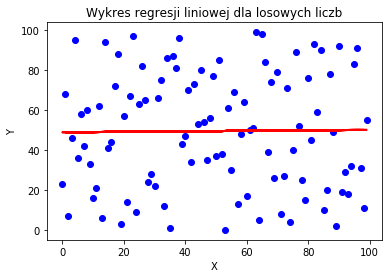

In [15]:
# Proces rysowania wykresu
plt.plot(xData, yData,'bo')
plt.plot(xData, line, color='red', linewidth=2)
plt.ylabel('Y')
plt.xlabel('X')
plt.title('Wykres regresji liniowej dla losowych liczb')
plt.show()